In [45]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import math

points = [[197 ,197   ],
 [100, 100  ],
 [ 80 ,140   ],
 [140, 100   ],
 [ 20, 140   ],
 [ 60 , 20   ],
 [140 ,180   ],
 [ 60 , 60   ],
 [140 ,140   ],
 [100  ,60   ],
 [ 60 ,160   ],
 [140  ,20   ]]




def distance(origin, destination): #found here https://gist.github.com/rochacbruno/2883505
    lat1, lon1 = origin[0],origin[1]
    lat2, lon2 = destination[0],destination[1]
    radius = 6371 # km
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

    return d

def create_clusters(number_of_clusters,points):
    kmeans = KMeans(n_clusters=number_of_clusters, random_state=0).fit(points)
    l_array = np.array([[label] for label in kmeans.labels_])
    clusters = np.append(points,l_array,axis=1)
    return clusters

def validate_solution(max_dist,clusters):
    _, __, n_clust = clusters.max(axis=0)
    n_clust = int(n_clust)
    for i in range(n_clust):
        two_d_cluster=clusters[clusters[:,2] == i][:,np.array([True, True, False])]
        if not validate_cluster(max_dist,two_d_cluster):
            return False
        else:
            continue
    return True

def validate_cluster(max_dist,cluster):
    distances = cdist(cluster,cluster, lambda ori,des: int(round(distance(ori,des))))
    print(distances)
    print(30*'-')
    for item in distances.flatten():
        if item > max_dist:
            return False
    return True


# for i in range(2,len(points)):
#     print(i)
#     print(validate_solution(20,create_clusters(i,points)))



[[197 197   3]
 [100 100   1]
 [ 80 140   0]
 [140 100   1]
 [ 20 140   0]
 [ 60  20   2]
 [140 180   3]
 [ 60  60   2]
 [140 140   1]
 [100  60   2]
 [ 60 160   0]
 [140  20   4]]
[[  0   0   0]
 [ 80 140   0]
 [ 20 140   0]
 [ 60 160   0]]


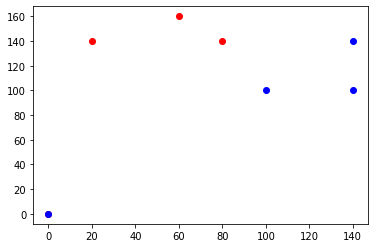

In [54]:
cluster = create_clusters(5,points)
cluster1 = np.array([0,0,0])
cluster2 = np.array([0,0,0])
print(cluster)
# cluster1=np.array((10,3))
# cluster2=np.array((10,3))
for i in range (cluster.shape[0]):
    if(cluster[i][2]==0):
        cluster1 = np.vstack([cluster1,cluster[i]])
    if(cluster[i][2]==1):
        cluster2 = np.vstack([cluster2,cluster[i]])
print(cluster1)
import matplotlib.pyplot as plt
plt.scatter(cluster1[:,0],cluster1[:,1], color = 'r')
plt.scatter( cluster2[:,0],cluster2[:,1], color='b') 


In [29]:
cluster.shape

(11, 3)

In [ ]:
def level4(botId):
	gz =get_greenZone_list()
	lgz = len(gz)
	print(lgz)
	gz = np.array(gz)
	gzs = gz[:,0]
	print(gzs)
	print(gz.shape)
	print(gz)


In [61]:
cluster = [[ 40 , 80,   0 ,  4],
 [120 ,180   ,0  , 5],
 [ 40 ,140   ,0,   6],
 [ 33  ,43   ,0 ,  7],
 [160   ,0  , 1  , 0],
 [160 ,140   ,1 ,  1],
 [180  ,40   ,1 ,  2],
 [197 ,197  , 1  , 3],
 [184 , 61 ,  1  , 8]]


array([[197, 197,   3],
       [100, 100,   1],
       [ 80, 140,   0],
       [140, 100,   1],
       [ 20, 140,   0],
       [ 60,  20,   2],
       [140, 180,   3],
       [ 60,  60,   2],
       [140, 140,   1],
       [100,  60,   2],
       [ 60, 160,   0],
       [140,  20,   4]])

In [60]:

np.split(cluster, np.where(np.diff(cluster[:,2]))[0]+1)

[array([[197, 197,   3]]),
 array([[100, 100,   1]]),
 array([[ 80, 140,   0]]),
 array([[140, 100,   1]]),
 array([[ 20, 140,   0]]),
 array([[60, 20,  2]]),
 array([[140, 180,   3]]),
 array([[60, 60,  2]]),
 array([[140, 140,   1]]),
 array([[100,  60,   2]]),
 array([[ 60, 160,   0]]),
 array([[140,  20,   4]])]

In [67]:
a = np.arange(5)
a = np.reshape(a,(1,5))
a.shape

(1, 5)